# I.데이터 전처리

## **1. 결측치 처리**

### 결측치 제거

In [2]:
#[코드 8-1] 결측치가 있는 데이터프레임
import pandas as pd
import numpy as np

df = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
                   'B': [6, 7, 8, np.nan, 10],
                   'C': [11, 12, 13, np.nan, np.nan]})
df

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,NaN,8.0,13.0
3,4.0,NaN,NaN
4,5.0,10.0,NaN


In [3]:
#[코드 8-2] 결측치 위치 확인
pd.isna(df)

,A,B,C
0,False,False,False
1,False,False,False
2,True,False,False
3,False,True,True
4,False,False,True


In [4]:
#[코드 8-3] 열별 결측치 개수 확인
pd.isna(df).sum()

A    1
B    1
C    2
dtype: int64

In [5]:
#[코드 8-4] 행별로 모든 결측치 제거
df_drop_nan = df.dropna()
df_drop_nan

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0


In [6]:
#특정 열의 결측치 제거
df_drop_B_C = df.dropna(subset=['B','C'])
df_drop_B_C

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,NaN,8.0,13.0


### 결측치 대체

In [7]:
#[코드 8-6] 숫자로 결측치 대체
df_0 = df['C'].fillna(0)
print(df_0)

0    11.0
1    12.0
2    13.0
3     0.0
4     0.0
Name: C, dtype: float64


In [8]:
#[코드 8-7] 문자로 결측치 대체
df_missing = df['A'].fillna('missing')
df_missing

0        1.0
1        2.0
2    missing
3        4.0
4        5.0
Name: A, dtype: object

In [9]:
#[코드 8-8] 평균으로 결측치 대체
# df.fillna(df.mean(), inplace=True)
df_mean = df.fillna(df.mean())
print(df, '\n')
print(df_mean)

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  NaN   8.0  13.0
3  4.0   NaN   NaN
4  5.0  10.0   NaN 

     A      B     C
0  1.0   6.00  11.0
1  2.0   7.00  12.0
2  3.0   8.00  13.0
3  4.0   7.75  12.0
4  5.0  10.00  12.0


In [10]:
#[코드 8-9] 주변 데이터로 결측치 대체
print(df, '\n')
#결측치 바로 위의 값으로 대체하기
df_ffill = df.fillna(method='ffill')
print(df_ffill, '\n')
#결측치 바로 아래의 값으로 대체하기
df_bfill = df.fillna(method='bfill')
print(df_bfill)

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  NaN   8.0  13.0
3  4.0   NaN   NaN
4  5.0  10.0   NaN 

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  2.0   8.0  13.0
3  4.0   8.0  13.0
4  5.0  10.0  13.0 

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  4.0   8.0  13.0
3  4.0  10.0   NaN
4  5.0  10.0   NaN


/tmp/ipykernel_20232/3401270137.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
/tmp/ipykernel_20232/3401270137.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


In [11]:
#[코드 8-10] 각 열을 서로 다른 값으로 대체
fill_dict = {'A': df['A'].mean(), 'B': '12/25', 'C': 'missing'}
df_filled = df.fillna(value=fill_dict)
df_filled

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,3.0,8.0,13.0
3,4.0,12/25,missing
4,5.0,10.0,missing


## **2. 이상치**

## **3. 표준화와 정규화**

#II. 데이터 전처리 활용

### **1. 지하수 데이터 수집**

In [12]:
#코드 8-11.라이브러리
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from datetime import datetime, date, time

warnings.filterwarnings('ignore')

In [13]:
#코드 8-12.파일명확인
path = './대전태평(암반)/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.xlsx')]
file_list_py 

['대전태평(암반)_2009_hr.xlsx',
 '대전태평(암반)_2010_hr.xlsx',
 '대전태평(암반)_2011_hr.xlsx',
 '대전태평(암반)_2012_hr.xlsx',
 '대전태평(암반)_2013_hr.xlsx',
 '대전태평(암반)_2014_hr.xlsx',
 '대전태평(암반)_2015_hr.xlsx',
 '대전태평(암반)_2016_hr.xlsx']

In [14]:
#코드 8-13.데이터프레임 하나로 병함
df = pd.DataFrame()
for i in file_list_py:
  data = pd.read_excel(path + i)
  df = pd.concat([df, data])
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20090101,0,16.1,44.47,749
1,대전태평,(암반),20090101,1,16.1,44.47,749
2,대전태평,(암반),20090101,2,16.1,44.47,749
3,대전태평,(암반),20090101,3,16.1,44.47,749
4,대전태평,(암반),20090101,4,16.1,44.47,749
...,...,...,...,...,...,...,...
8761,대전태평,(암반),20161231,19,16.2,44.49,725
8762,대전태평,(암반),20161231,20,16.2,44.49,725
8763,대전태평,(암반),20161231,21,16.2,44.49,725
8764,대전태평,(암반),20161231,22,16.2,44.49,725


In [15]:
#코드 8-14.행 인덱스 재설정
df = df.reset_index(drop=True)
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20090101,0,16.1,44.47,749
1,대전태평,(암반),20090101,1,16.1,44.47,749
2,대전태평,(암반),20090101,2,16.1,44.47,749
3,대전태평,(암반),20090101,3,16.1,44.47,749
4,대전태평,(암반),20090101,4,16.1,44.47,749
...,...,...,...,...,...,...,...
69543,대전태평,(암반),20161231,19,16.2,44.49,725
69544,대전태평,(암반),20161231,20,16.2,44.49,725
69545,대전태평,(암반),20161231,21,16.2,44.49,725
69546,대전태평,(암반),20161231,22,16.2,44.49,725


In [16]:
#코드 8-15.데이터프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69548 entries, 0 to 69547
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관측소       69548 non-null  object 
 1   구분        69548 non-null  object 
 2   날짜        69548 non-null  int64  
 3   시간        69548 non-null  int64  
 4   수온(℃)     69548 non-null  float64
 5   수위(el.m)  69548 non-null  float64
 6   EC(㎲/㎝)   69548 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 3.7+ MB


In [ ]:
#코드 8-16.인덱스지정 (Date를 인덱스로 지정)
df['Date'] = pd.to_datetime(df['날짜'],format='%Y%m%d') +\
             pd.to_timedelta(df['시간'].astype(int),unit='h')

df.set_index(df['Date'], inplace=True)
df.head(3)

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝),Date
Date,,,,,,,,
2009-01-01 00:00:00,대전태평,(암반),20090101,0,16.1,44.47,749,2009-01-01 00:00:00
2009-01-01 01:00:00,대전태평,(암반),20090101,1,16.1,44.47,749,2009-01-01 01:00:00
2009-01-01 02:00:00,대전태평,(암반),20090101,2,16.1,44.47,749,2009-01-01 02:00:00


In [18]:
#코드 8-17.분석할 속성만 조회하여 저장
df1 = df[['수온(℃)', '수위(el.m)','EC(㎲/㎝)']]
df1.columns = ['temp', 'level', 'EC']
df1.head(3)

,temp,level,EC
Date,,,
2009-01-01 00:00:00,16.1,44.47,749
2009-01-01 01:00:00,16.1,44.47,749
2009-01-01 02:00:00,16.1,44.47,749


In [19]:
#코드 8-18.결측치 수 확인
df1.isnull().sum()

temp     0
level    0
EC       0
dtype: int64

In [20]:
#코드 8-19.CSV파일 저장
df1.to_csv('./대전지하수.csv', encoding='cp949')

### **2. 이상치 확인 및 제거**

In [ ]:
#코드 8-20.통계량으로 이상치 확인 (min 값이 13인게 이상치)
df = pd.read_csv('./대전지하수.csv', index_col='Date', parse_dates=True, encoding='cp949')
df.describe()

,temp,level,EC
count,69548.000000,69548.000000,69548.000000
mean,16.262491,44.295353,727.024027
std,0.089778,2.539464,51.544590
min,15.800000,11.530000,13.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.460000,730.000000
75%,16.300000,44.550000,742.000000
max,16.500000,45.900000,778.000000


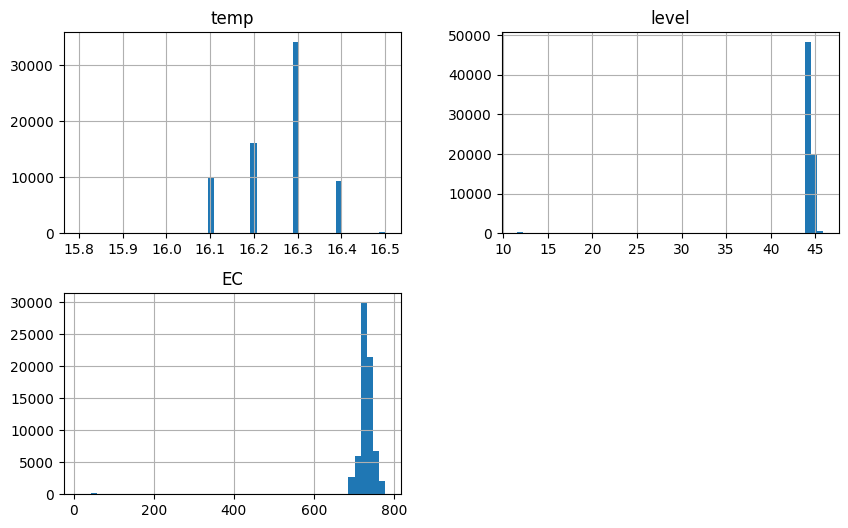

In [22]:
#코드 8-21.히스토그램
df.hist(bins=50, figsize=(10,6))
plt.show()

<Axes: >

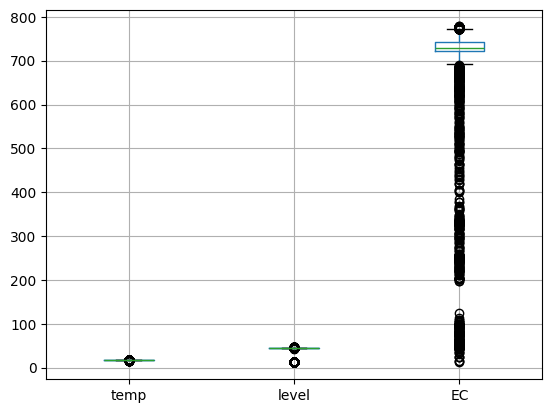

In [23]:
#코드 8-22.상자 그래프로 이상치 확인
df.boxplot()

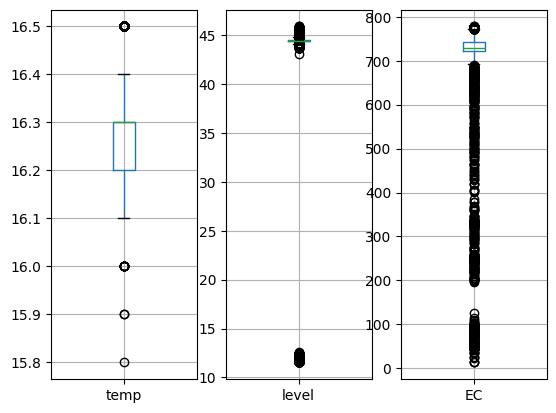

In [24]:
#코드 8-23.다중 상자 그래프로 이상치 확인
plt.subplot(1, 3, 1)
df.boxplot(column='temp', return_type='both')
plt.subplot(1, 3, 2)
df.boxplot(column='level', return_type='both')
plt.subplot(1, 3, 3)
df.boxplot(column='EC', return_type='both')
plt.show()

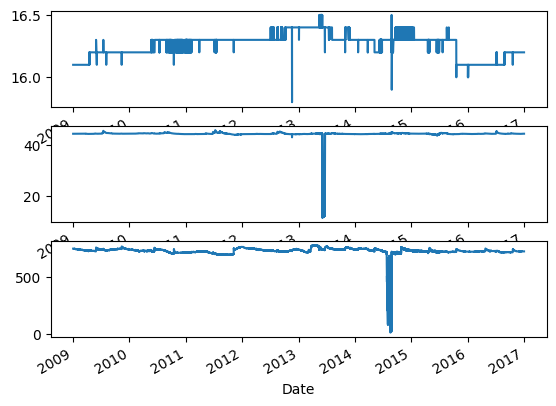

In [25]:
#코드 8-24.다중 시계열 그래프
plt.subplot(3, 1, 1)
df['temp'].plot()
plt.subplot(3, 1, 2)
df['level'].plot()
plt.subplot(3, 1, 3)
df['EC'].plot()
plt.show()

In [26]:
#코드 8-25.지하수위 IQR
q3_level = df['level'].quantile(q=0.75)
q1_level = df['level'].quantile(q=0.25)
iqr_level = q3_level - q1_level
print(iqr_level)

0.17999999999999972


In [27]:
#코드 8-26.지하수위 상하한값과 이상치 개수
upper_level = q3_level + 1.5 * iqr_level
lower_level = q1_level - 1.5 * iqr_level
print(upper_level, '/', lower_level)
print((df['level'] > upper_level).sum())
print((df['level'] < lower_level).sum())

44.81999999999999 / 44.099999999999994
4492
1273


<Axes: xlabel='Date'>

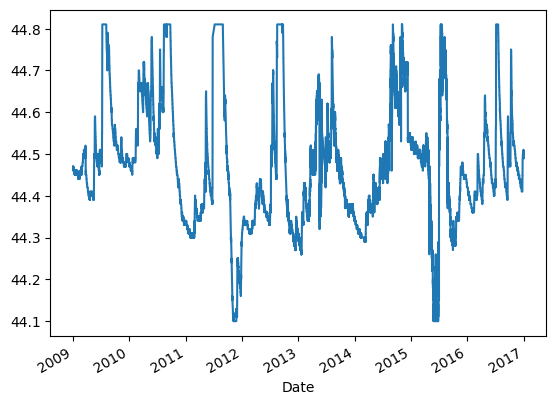

In [ ]:
#코드 8-27.이상치를 제거한 지하수위 => 스케일링 작업 후
df_iqr_level = df[(df['level'] < upper_level) & (df['level'] > lower_level)]
df_iqr_level['level'].plot()

In [29]:
#코드 8-28.지하수온 IQR과 이상치 개수
#사분위수와 IQR 구하기
q3_temp = df['temp'].quantile(q=0.75)
q1_temp = df['temp'].quantile(q=0.25)
iqr_temp = q3_temp-q1_temp
print('IQR:', iqr_temp)
#지하수온 상한값, 하한값, 이상치 개수 구하기
upper_temp = q3_temp + iqr_temp * 1.5
lower_temp = q1_temp - iqr_temp * 1.5
print(upper_temp, '/', lower_temp)
print((df['temp'] > upper_temp).sum())
print((df['temp'] < lower_temp).sum())

IQR: 0.10000000000000142
16.450000000000003 / 16.049999999999997
227
15


In [31]:
#코드 8-29.전기전도도 IQR과 이상치 개수
#사분위수와 IQR 구하기
q3_ec = df['EC'].quantile(q=0.75)##채우기
q1_ec = df['EC'].quantile(q=0.25)##채우기
iqr_ec = q3_ec - q1_ec##채우기
print('IQR:', iqr_ec)
#지하수온 상한값, 하한값, 이상치 개수 구하기
upper_ec = q3_ec + iqr_ec * 1.5 ##채우기
lower_ec = q1_ec - iqr_ec * 1.5 ##채우기
print(upper_ec, '/', lower_ec)
print((df['EC'] > upper_ec).sum())
print((df['EC'] < lower_ec).sum())

IQR: 20.0
772.0 / 692.0
831
788


In [32]:
#코드 8-30. 이상치를 한꺼번에 제거
df_iqr = df[(df['temp'] < upper_temp) & (df['temp'] > lower_temp) &\
            (df['level'] < upper_level) & (df['level'] > lower_level) &\
             (df['EC'] < upper_ec) & (df['EC'] > lower_ec)]

In [33]:
#코드 8-31.이상치 제거 후 통계량
df_iqr.describe()

,temp,level,EC
count,61814.000000,61814.000000,61814.000000
mean,16.256793,44.459701,731.698612
std,0.089692,0.128256,13.882905
min,16.100000,44.100000,693.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.450000,730.000000
75%,16.300000,44.520000,742.000000
max,16.400000,44.810000,771.000000


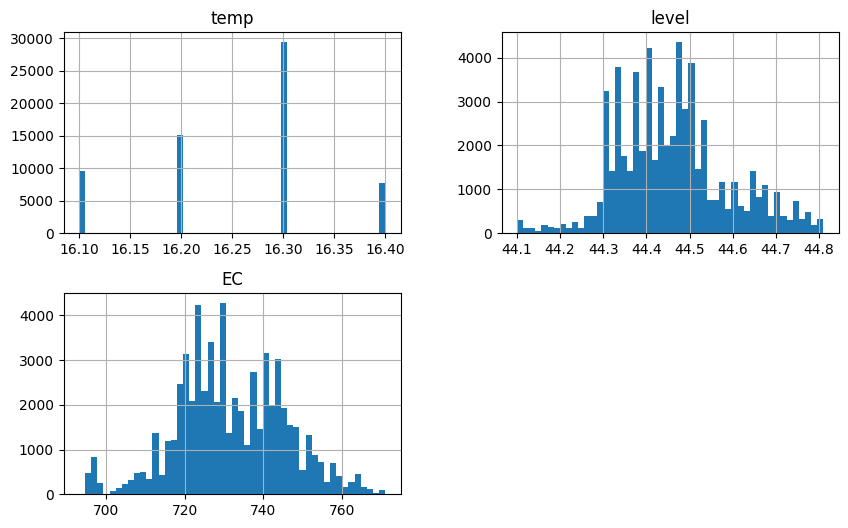

In [34]:
#코드 8-32.이상치 제거 후 히스토그램
df_iqr.hist(bins=50, figsize=(10,6))
plt.show()

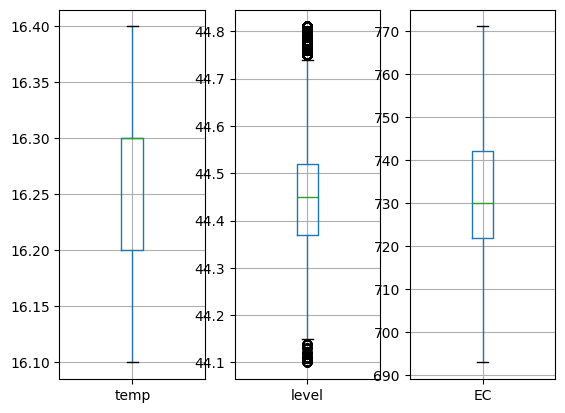

In [35]:
#코드 8-33.이상치 제거 후 상자 그래프
plt.subplot(1, 3, 1)
df_iqr.boxplot(column='temp', return_type='both')
plt.subplot(1, 3, 2)
df_iqr.boxplot(column='level', return_type='both')
plt.subplot(1, 3, 3)
df_iqr.boxplot(column='EC', return_type='both')
plt.show()

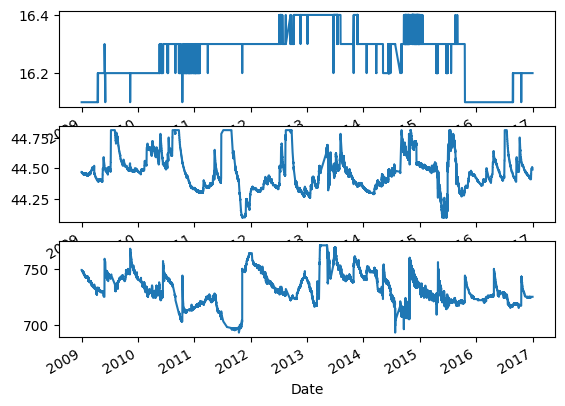

In [36]:
#코드 8-34.이상치 제거 후 추이 그래프
plt.subplot(3, 1, 1)
df_iqr['temp'].plot()
plt.subplot(3, 1, 2)
df_iqr['level'].plot()
plt.subplot(3, 1, 3)
df_iqr['EC'].plot()
plt.show()

In [37]:
#코드 8-35.csv파일로 저장
df_iqr.to_csv('대전지하수_정제.csv', encoding='cp949')

### **3. 표준화와 정규화**

In [38]:
#코드 8-36.파일 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./대전지하수_정제.csv')
df.head()  

,Date,temp,level,EC
0,2009-01-01 00:00:00,16.1,44.47,749
1,2009-01-01 01:00:00,16.1,44.47,749
2,2009-01-01 02:00:00,16.1,44.47,749
3,2009-01-01 03:00:00,16.1,44.47,749
4,2009-01-01 04:00:00,16.1,44.47,749


In [39]:
#코드 8-37.스케일링할 열 확인
df = df[['level', 'EC']]
df.describe()

,level,EC
count,61814.000000,61814.000000
mean,44.459701,731.698612
std,0.128256,13.882905
min,44.100000,693.000000
25%,44.370000,722.000000
50%,44.450000,730.000000
75%,44.520000,742.000000
max,44.810000,771.000000


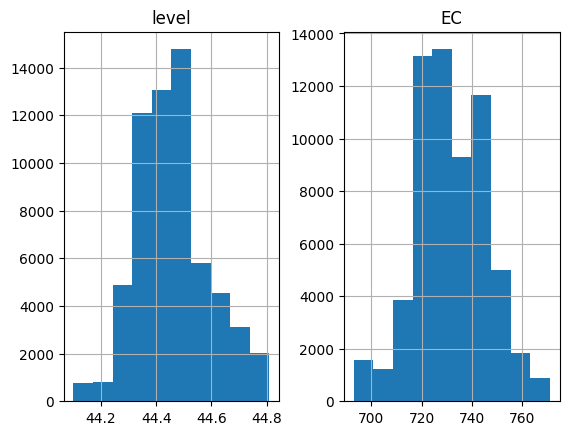

In [40]:
#코드 8-38.히스토그램
df.hist()
plt.show()

In [41]:
#코드 8-39.사본생성
df1 = df.copy()
df1.head(3)

,level,EC
0,44.47,749
1,44.47,749
2,44.47,749


In [ ]:
#코드 8-40.표준화 (인공지능 학습 시킬 때 스케일링 하는 건 서로 비교가 용이해지기 때문)
df1['level_z_score'] = (df1['level'] - df1['level'].mean()) / df1['level'].std()
df1['EC_z_score'] = (df1['EC'] - df1['EC'].mean()) / df1['EC'].std()
df1.head(3)

,level,EC,level_z_score,EC_z_score
0,44.47,749,0.0803,1.246237
1,44.47,749,0.0803,1.246237
2,44.47,749,0.0803,1.246237


In [43]:
#코드 8-41.표준화 후 통계량
df1.describe()

,level,EC,level_z_score,EC_z_score
count,61814.000000,61814.000000,6.181400e+04,6.181400e+04
mean,44.459701,731.698612,6.867116e-14,-2.052521e-15
std,0.128256,13.882905,1.000000e+00,1.000000e+00
min,44.100000,693.000000,-2.804553e+00,-2.787501e+00
25%,44.370000,722.000000,-6.993901e-01,-6.986011e-01
50%,44.450000,730.000000,-7.563803e-02,-1.223528e-01
75%,44.520000,742.000000,4.701450e-01,7.420196e-01
max,44.810000,771.000000,2.731246e+00,2.830920e+00


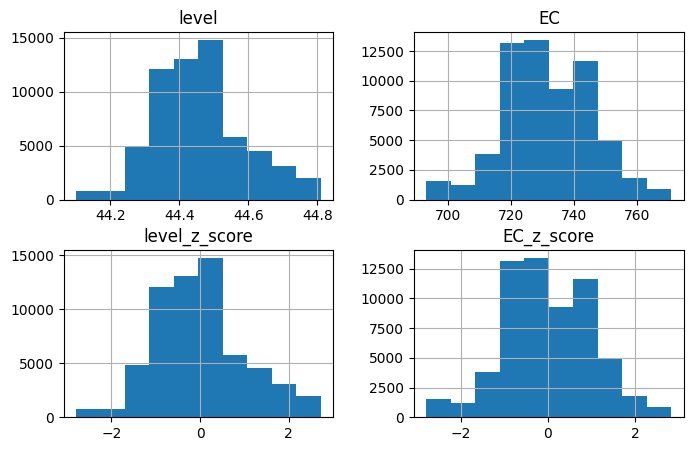

In [44]:
#코드 8-42.표준화 후 히스토그램
df1.hist(figsize=(8,5))
plt.show()

In [45]:
#코드 8-43.데이터프레임 이름으로 표준화
df2 = df.copy()
df2_standard = (df2-df2.mean()) / df2.std()
df2_standard.head(3)

,level,EC
0,0.0803,1.246237
1,0.0803,1.246237
2,0.0803,1.246237


In [47]:
#코드 8-44.데이터 사본 정규화
df3 = df.copy()

df3['level_minmax'] = (df3['level']-df3['level'].min()) / (df3['level'].max()\
                                                           -df3['level'].min())
df3['EC_minmax'] = (df3['EC']-df3['EC'].min()) / (df3['EC'].max() - df3['EC'].min())    
df3.head(3)

,level,EC,level_minmax,EC_minmax
0,44.47,749,0.521127,0.717949
1,44.47,749,0.521127,0.717949
2,44.47,749,0.521127,0.717949


In [48]:
#코드 8-45.정규화 후 통계량
df3.describe()

,level,EC,level_minmax,EC_minmax
count,61814.000000,61814.000000,61814.000000,61814.000000
mean,44.459701,731.698612,0.506621,0.496136
std,0.128256,13.882905,0.180642,0.177986
min,44.100000,693.000000,0.000000,0.000000
25%,44.370000,722.000000,0.380282,0.371795
50%,44.450000,730.000000,0.492958,0.474359
75%,44.520000,742.000000,0.591549,0.628205
max,44.810000,771.000000,1.000000,1.000000


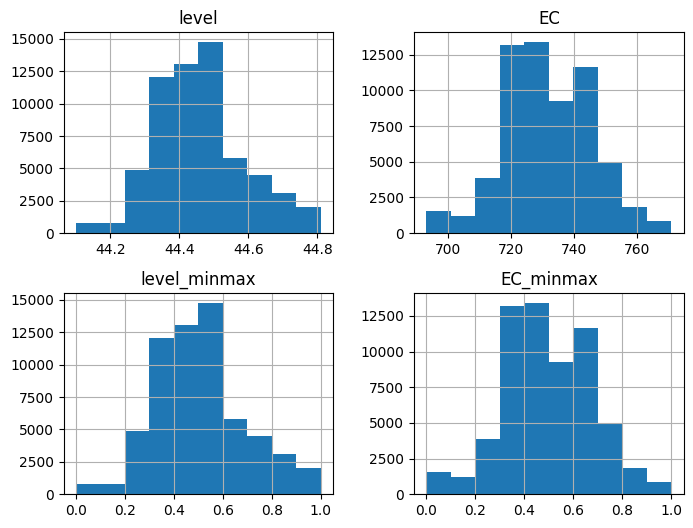

In [ ]:
#코드 8-46.정규화 후 히스토그램
df3.hist(figsize=(8,6)) 
plt.show()